我们将对糖尿病病人的数据使用 MeanShift、AgglomerativeClustering、Birch 三种方法进行聚类并通过可视化查看其聚类效果

首先我们导入所需要的的包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.datasets import load_diabetes
from scipy import ndimage
from sklearn import manifold
from time import time

接着我们导入Sklearn中自带的糖尿病病人数据集

In [2]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

对数据集进行标准化、区间缩放以及归一化处理，解决不同量纲对数据集的影响

In [3]:
from sklearn.preprocessing import StandardScaler
 
X = StandardScaler().fit_transform(X)

In [4]:
from sklearn.preprocessing import MinMaxScaler
 
X = MinMaxScaler().fit_transform(X)

In [5]:
from sklearn.preprocessing import Normalizer

X = Normalizer().fit_transform(X)

为此我们定义了一个可视化函数

In [6]:
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

为了从不同角度观察数据的聚类情况，我们采用了降维和抽取特征值两种方法

### 1. 降维

先将数据集通过降维函数降至二维

In [7]:
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)

E:\Anaconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [9]:
X_red

array([[ 1.05469352e-02,  1.68360223e-17],
       [ 9.88401958e-04,  1.65924371e-02],
       [ 1.05469352e-02,  3.16199484e-17],
       [ 9.88401958e-04, -1.15501650e-02],
       [ 9.88401958e-04,  2.02914560e-03],
       [ 9.88401958e-04,  8.66113820e-03],
       [ 1.05469352e-02,  2.70432122e-17],
       [ 1.05469352e-02,  1.49598015e-17],
       [ 1.05469352e-02,  2.45592845e-17],
       [ 9.88401958e-04, -1.18825462e-02],
       [ 9.88401958e-04,  4.65316327e-03],
       [ 1.05469352e-02,  7.15447104e-18],
       [ 9.88401958e-04,  1.04602950e-02],
       [ 1.05469352e-02, -4.95817599e-18],
       [ 9.88401958e-04,  1.52356006e-02],
       [ 1.05469352e-02, -3.34622188e-17],
       [ 9.88401958e-04, -1.22204275e-03],
       [ 1.05469352e-02, -3.83385573e-18],
       [ 9.88401958e-04, -1.09541171e-02],
       [ 9.88401958e-04,  6.41793258e-03],
       [ 9.88401958e-04,  3.77586980e-03],
       [ 1.05469352e-02,  9.24683715e-18],
       [ 9.88401958e-04,  2.05035904e-03],
       [ 1.

使用 MeanShift 方法进行拟合并可视化

MeanShift:	0.03s


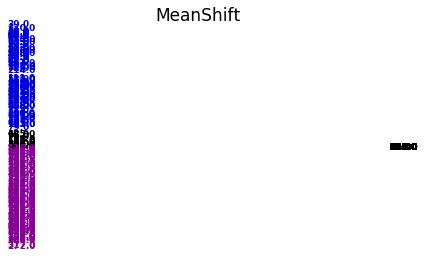

In [8]:
t0 = time()
bandwidth = estimate_bandwidth(X_red)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_red)
print("MeanShift:\t%.2fs" % (time() - t0))
plot_clustering(X_red, ms.labels_,"MeanShift" )

使用 Birch 方法进行拟合并可视化

 Birch:	0.08s


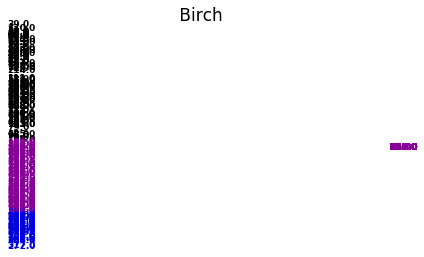

In [23]:
t1 = time()
birch = Birch(threshold = 0.001,n_clusters = 3)
birch.fit_predict(X_red)
print(" Birch:\t%.2fs" % (time() - t1))
plot_clustering(X_red, birch.labels_," Birch" )

使用 AgglomerativeClustering 方法进行拟合并可视化

ward :	0.00s
average :	0.00s
complete :	0.00s
single :	0.00s


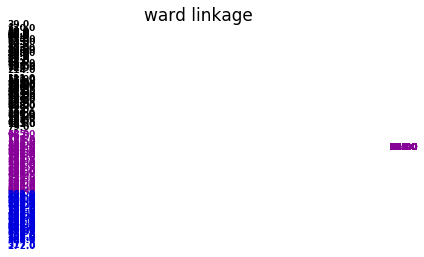

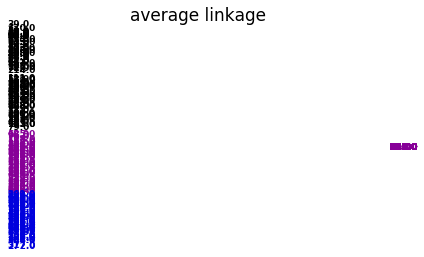

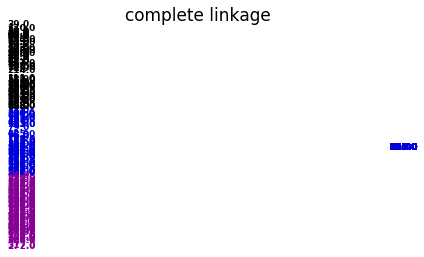

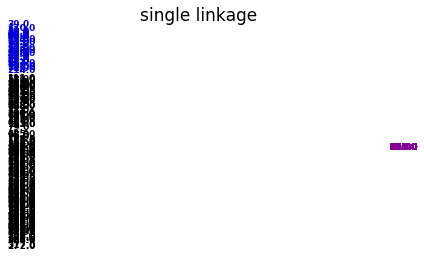

In [24]:
for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=3)
    t2 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t2))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


plt.show()

### 2. 抽取特征值

使用抽取特征值得方法并不需要对多维数据集进行降维，所以我们直接使用 MeanShift方法 及 Birch方法对多维数据集拟合

In [34]:
bandwidth_1 = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms_1 = MeanShift(bandwidth=bandwidth_1, bin_seeding=True)
ms_1.fit(X)
birch_1 = Birch(threshold = 0.1,n_clusters = 2)
birch_1.fit_predict(X)

diabetes['ms_label'] = ms_1.labels_
diabetes['birch.labels_'] = birch_1.labels_

对比 MeanShift 方法及 Birch 方法中年龄变量与标签的聚类关系

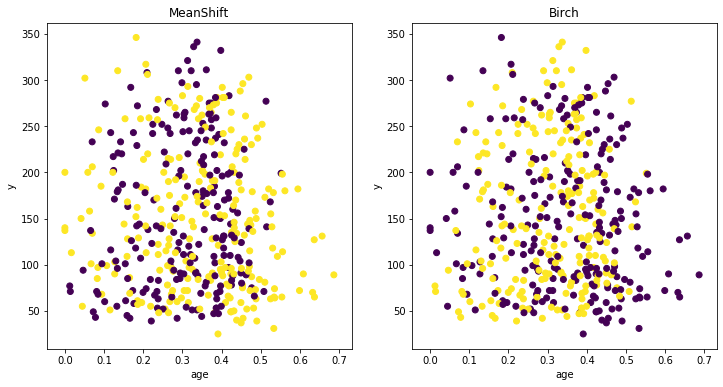

In [44]:
plt.figure(figsize = (12,6))
ax1 = plt.subplot2grid(shape = (1,2), loc = (0,0))
ax1.set_title('MeanShift')   
plt.xlabel('age')    
plt.ylabel('y')
ax1.scatter(X[:,0], y, c = ms_1.labels_)
ax2 = plt.subplot2grid(shape = (1,2), loc = (0,1))
ax2.set_title('Birch')
plt.xlabel('age')    
plt.ylabel('y')
ax2.scatter(X[:,0], y, c =birch_1.labels_)
plt.show()

对比 MeanShift 方法及 Birch 方法中性别变量与标签的聚类关系

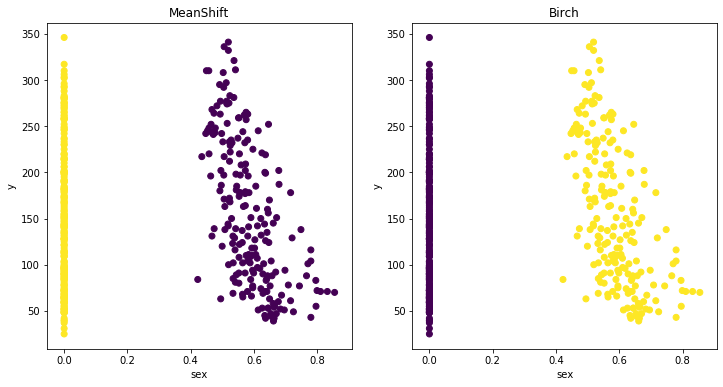

In [45]:
plt.figure(figsize = (12,6))
ax1 = plt.subplot2grid(shape = (1,2), loc = (0,0))
ax1.set_title('MeanShift')   
plt.xlabel('sex')    
plt.ylabel('y')
ax1.scatter(X[:,1], y, c = ms_1.labels_)
ax2 = plt.subplot2grid(shape = (1,2), loc = (0,1))
ax2.set_title('Birch')
plt.xlabel('sex')    
plt.ylabel('y')
ax2.scatter(X[:,1], y, c =birch_1.labels_)
plt.show()

对比 MeanShift 方法及 Birch 方法中BMI指数变量与标签的聚类关系

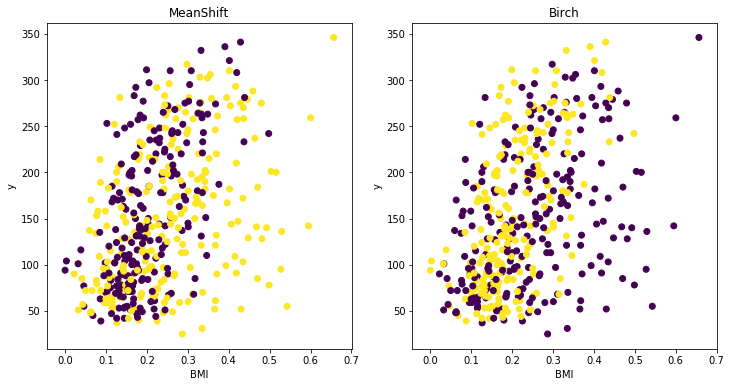

In [49]:
plt.figure(figsize = (12,6))
ax1 = plt.subplot2grid(shape = (1,2), loc = (0,0))
ax1.set_title('MeanShift')   
plt.xlabel('BMI')    
plt.ylabel('y')
ax1.scatter(X[:,2], y, c = ms_1.labels_)
ax2 = plt.subplot2grid(shape = (1,2), loc = (0,1))
ax2.set_title('Birch')
plt.xlabel('BMI')    
plt.ylabel('y')
ax2.scatter(X[:,2], y, c =birch_1.labels_)
plt.show()

最后我们再对数据集使用 AgglomerativeClustering 方法聚类，得到其年龄、性别、BMI指数与标签的聚类关系

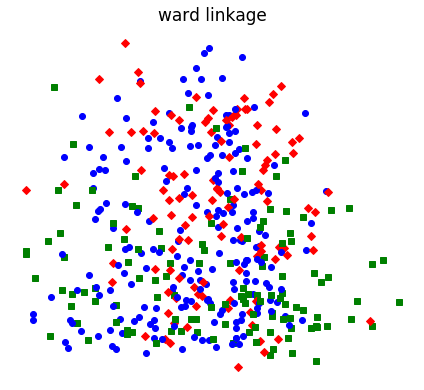

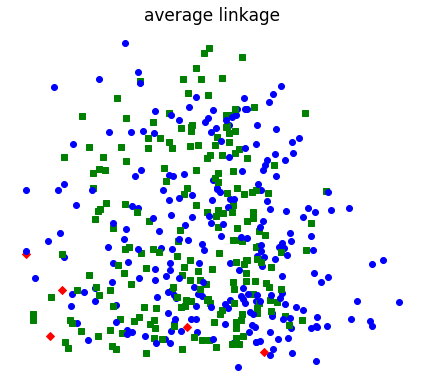

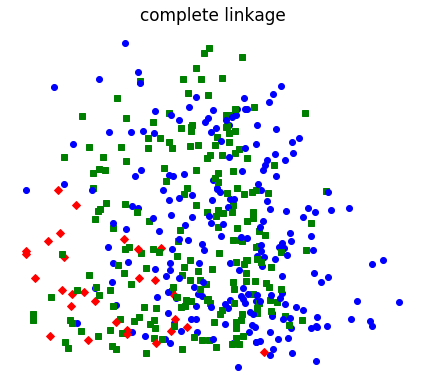

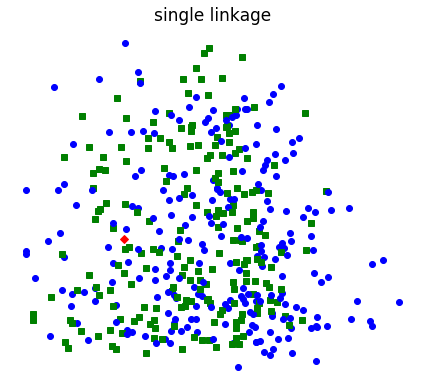

In [46]:
for linkage in ('ward', 'average', 'complete', 'single'):
    clustering_1 = AgglomerativeClustering(linkage=linkage, n_clusters=3)
    clustering_1.fit(X)
    plt.figure(figsize=(6,6)) 
    colors = ['b', 'g', 'r'] 
    markers = ['o', 's', 'D']
    for i,l in enumerate(clustering_1.labels_): 
        plt.plot(X[i][0],y[i],color=colors[l],marker=markers[l],ls='None') 
        plt.xlabel("age")
        plt.ylabel("y")
    plt.title("%s linkage" % linkage, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

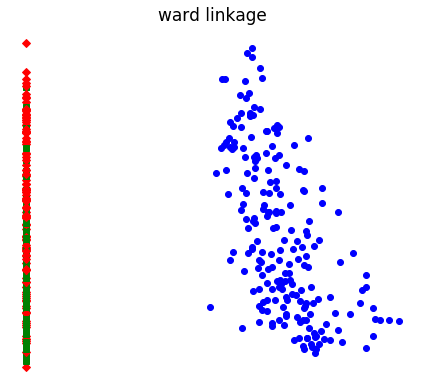

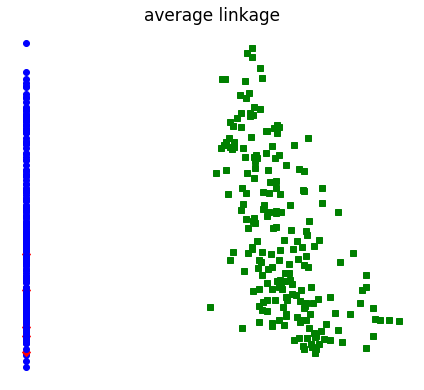

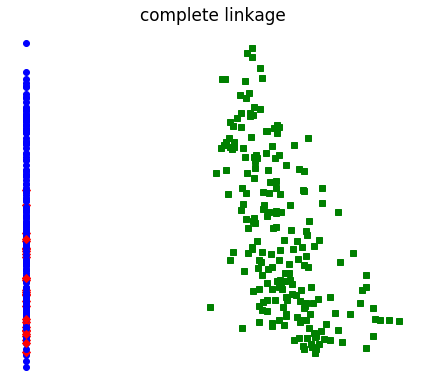

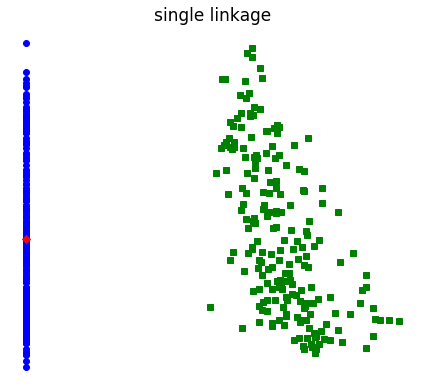

In [47]:
for linkage in ('ward', 'average', 'complete', 'single'):
    clustering_1 = AgglomerativeClustering(linkage=linkage, n_clusters=3)
    clustering_1.fit(X)
    plt.figure(figsize=(6,6)) 
    colors = ['b', 'g', 'r'] 
    markers = ['o', 's', 'D']
    for i,l in enumerate(clustering_1.labels_): 
        plt.plot(X[i][1],y[i],color=colors[l],marker=markers[l],ls='None') 
        plt.xlabel("sex")
        plt.ylabel("y")
    plt.title("%s linkage" % linkage, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

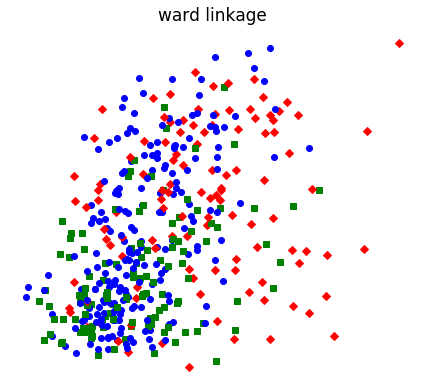

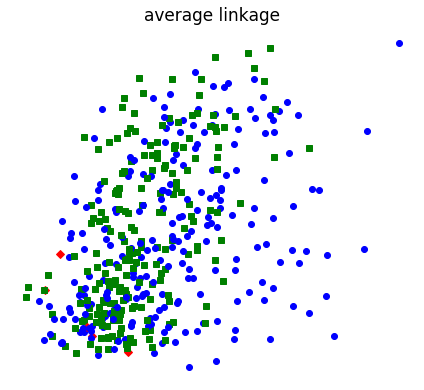

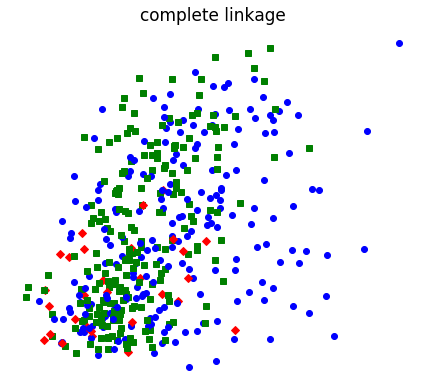

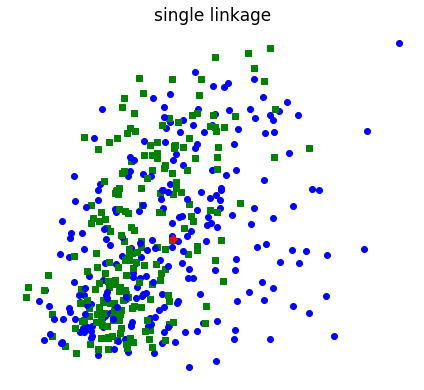

In [50]:
for linkage in ('ward', 'average', 'complete', 'single'):
    clustering_1 = AgglomerativeClustering(linkage=linkage, n_clusters=3)
    clustering_1.fit(X)
    plt.figure(figsize=(6,6)) 
    colors = ['b', 'g', 'r'] 
    markers = ['o', 's', 'D']
    for i,l in enumerate(clustering_1.labels_): 
        plt.plot(X[i][2],y[i],color=colors[l],marker=markers[l],ls='None') 
        plt.xlabel("BMI")
        plt.ylabel("y")
    plt.title("%s linkage" % linkage, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()